# Results

This notebook highlights the key insights of experiment outcomes.

In [1]:
import pandas as pd

from experiments.experiment import *
from results import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import ast
from tqdm import tqdm
import re

import warnings

warnings.filterwarnings("ignore")

## Read results

In [2]:
results_gf = load_results_from_csv(ec_name='Gridflex')

In [3]:
results_gm = load_results_from_csv(ec_name='GroeneMient')

## Prepare results

In [4]:
number_of_steps = 365
number_of_simulation_runs = 10

In [5]:
same_levers, unique_levers = get_unique_levers_dict()

setting up the experiments...



### Extracting model performance matrices

In [6]:
# Results to be printed
for experiment, runs in results_gf.items():
    column_names = list(runs.columns)[1:]
    break

column_names = column_names[1:]
print(column_names)

['M1: realised_demand', 'M2: scheduled_demand', 'M3: shifted_load', 'M4: total_generation', 'M5: savings_on_ToD', 'M6: energy_costs']


### Separate results for each experiment setup

In [10]:
results_gm = separate_experiment_setups(results=results_gm, number_of_steps=number_of_steps)

In [11]:
results_gf = separate_experiment_setups(results=results_gf, number_of_steps=number_of_steps)

In [12]:
same_levers

{0: [0, 27, 54, 81, 108, 135, 162, 189],
 1: [1, 28, 55, 82, 109, 136, 163, 190],
 2: [2, 29, 56, 83, 110, 137, 164, 191],
 3: [3, 30, 57, 84, 111, 138, 165, 192],
 4: [4, 31, 58, 85, 112, 139, 166, 193],
 5: [5, 32, 59, 86, 113, 140, 167, 194],
 6: [6, 33, 60, 87, 114, 141, 168, 195],
 7: [7, 34, 61, 88, 115, 142, 169, 196],
 8: [8, 35, 62, 89, 116, 143, 170, 197],
 9: [9, 36, 63, 90, 117, 144, 171, 198],
 10: [10, 37, 64, 91, 118, 145, 172, 199],
 11: [11, 38, 65, 92, 119, 146, 173, 200],
 12: [12, 39, 66, 93, 120, 147, 174, 201],
 13: [13, 40, 67, 94, 121, 148, 175, 202],
 14: [14, 41, 68, 95, 122, 149, 176, 203],
 15: [15, 42, 69, 96, 123, 150, 177, 204],
 16: [16, 43, 70, 97, 124, 151, 178, 205],
 17: [17, 44, 71, 98, 125, 152, 179, 206],
 18: [18, 45, 72, 99, 126, 153, 180, 207],
 19: [19, 46, 73, 100, 127, 154, 181, 208],
 20: [20, 47, 74, 101, 128, 155, 182, 209],
 21: [21, 48, 75, 102, 129, 156, 183, 210],
 22: [22, 49, 76, 103, 130, 157, 184, 211],
 23: [23, 50, 77, 104, 131,

In [13]:
unique_levers

,L1,L2,L3,lever information
0,0.00,0.1,0.10,L1:B L2:V L3:V
1,0.00,0.1,0.45,L1:B L2:V L3:O
2,0.00,0.1,0.90,L1:B L2:V L3:V
3,0.00,0.5,0.10,L1:B L2:B L3:V
4,0.00,0.5,0.45,L1:B L2:B L3:O
5,0.00,0.5,0.90,L1:B L2:B L3:V
6,0.00,1.0,0.10,L1:B L2:V L3:V
7,0.00,1.0,0.45,L1:B L2:V L3:O
8,0.00,1.0,0.90,L1:B L2:V L3:V
9,0.50,0.1,0.10,L1:B L2:V L3:V


In [15]:
experiment_test = Experiment()
experimental_conditions = experiment_test.prepare_experiment_setup()

setting up the experiments...



In [52]:
experimental_conditions

,X1,X2,X3,L1,L2,L3
0,0.4,0.5,0.5,0.00,0.1,0.10
1,0.4,0.5,0.5,0.00,0.1,0.45
2,0.4,0.5,0.5,0.00,0.1,0.90
3,0.4,0.5,0.5,0.00,0.5,0.10
4,0.4,0.5,0.5,0.00,0.5,0.45
...,...,...,...,...,...,...
211,0.8,1.0,0.9,0.75,0.5,0.45
212,0.8,1.0,0.9,0.75,0.5,0.90
213,0.8,1.0,0.9,0.75,1.0,0.10
214,0.8,1.0,0.9,0.75,1.0,0.45


## Plotting important uncertainty scenarios

Three important uncertainty scenarios are plotted in the following section

| Uncertainty Scenarios                                 | X1  | X2  | X3  |
|-------------------------------------------------------|-----|-----|-----|
| 'low availability of overall flexible demand'         | 0.4 | 0.5 | 0.5 |
| 'higher availability of overall flexible load'        | 0.8 | 1.0 | 0.9 |
| 'low availability of non-residential flexible demand' | 0.8 | 0.5 | 0.9 |

In [60]:
uncertainty_scenarios = {'low availability of overall flexible demand': experimental_conditions.loc[
    (experimental_conditions['X1'] == 0.4) & (experimental_conditions['X2'] == 0.5) & (
            experimental_conditions['X3'] == 0.5)].index.to_list(),
                         'higher availability of overall flexible load': experimental_conditions.loc[
                             (experimental_conditions['X1'] == 0.8) & (experimental_conditions['X2'] == 1) & (
                                     experimental_conditions['X3'] == 0.9)].index.to_list(),
                         'low availability of non-residential flexible demand': experimental_conditions.loc[
                             (experimental_conditions['X1'] == 0.8) & (experimental_conditions['X2'] == 0.5) & (
                                     experimental_conditions['X3'] == 0.9)].index.to_list()
                         }


In [72]:
axs_index

[[<AxesSubplot:>, <AxesSubplot:>],
 [<AxesSubplot:>, <AxesSubplot:>],
 [<AxesSubplot:>, <AxesSubplot:>]]

Text(0.5, 0.93, 'Shifted load through demand response under selected uncertainty scenarios')

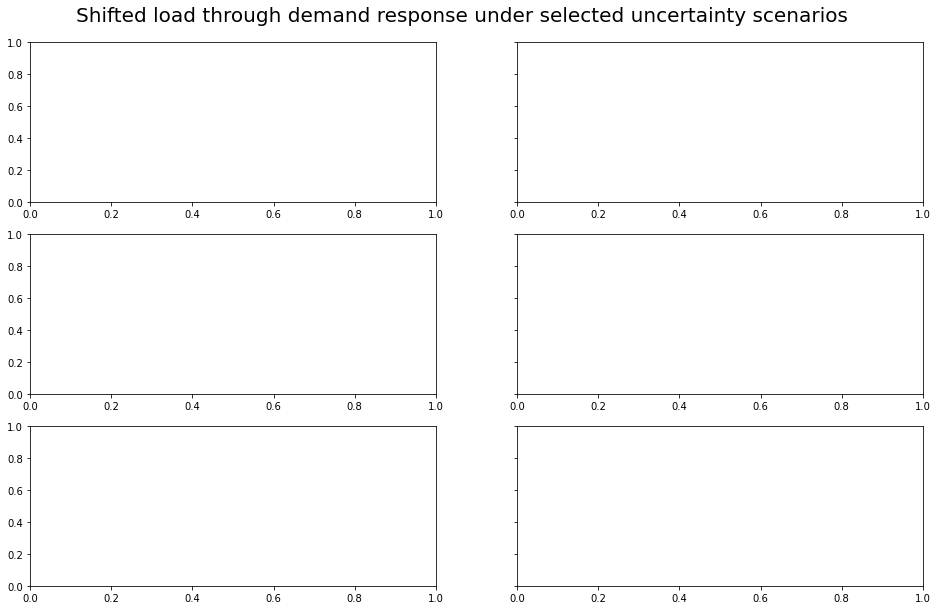

  0%|          | 0/3 [00:07<?, ?it/s]


ValueError: Length of values (365) does not match length of index (364)

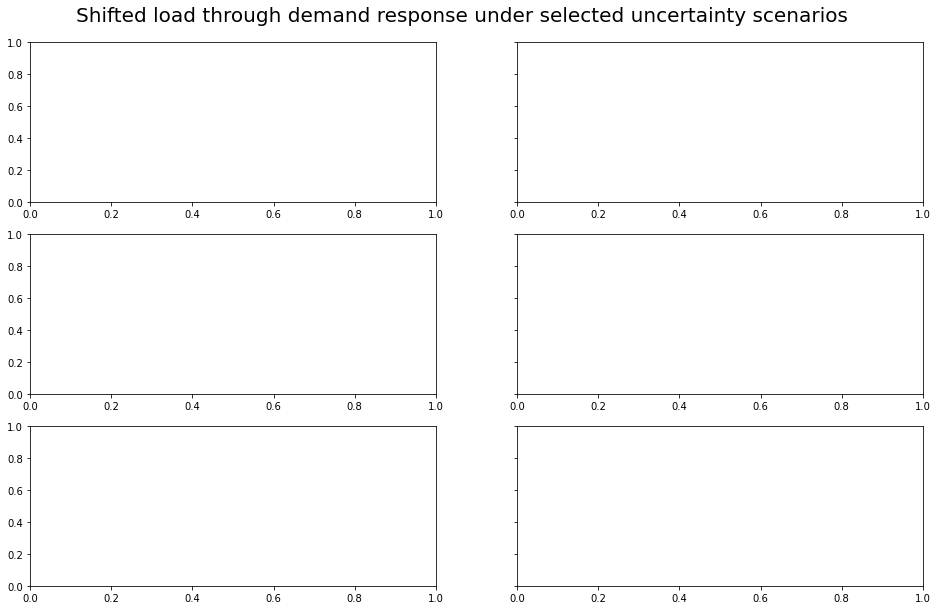

In [78]:
fig, axs = plt.subplots(3, 2, sharex=False, sharey=True, squeeze=True, figsize=(16, 10))
axs_index = [[axs[0, 0], axs[0, 1]], [axs[1, 0], axs[1, 1]], [axs[2, 0], axs[2, 1]]]
fig.suptitle('Shifted load through demand response under selected uncertainty scenarios', fontsize=20, y=0.93)

ax_id = 0
for key in tqdm(uncertainty_scenarios.keys()):
    experiment_setups = uncertainty_scenarios[key]
    # iterate through every experiment setup listed in
    for experiment_setup in experiment_setups:
        results = results_gf[str(experiment_setup)]
        # result contain ten iteration of results for each simulation run
        # iterate through simulation runs
        ax = axs_index[ax_id]
        for result in results:
            shifted_load = extract_df_from_json(result, 'M3: shifted_load')
            shifted_load = shifted_load[:364]
            shifted_load['date'] = pd.date_range(start='1/1/2021', end='31/12/2021')
            shifted_load.set_index('date', inplace=True, drop=True)

            residential = shifted_load.columns.to_list()[:-2]
            nonresidential = shifted_load.columns.to_list()[-2:]
            # calculate total results for residential and non-residential community members
            shifted_load['residential'] = shifted_load.loc[:, residential].sum(axis=1)
            shifted_load['nonresidential'] = shifted_load.loc[:, nonresidential].sum(axis=1) / 4
            # remove unwanted columns
            columns_to_keep = ['residential', 'nonresidential']
            shifted_load = shifted_load[columns_to_keep]
            # Set lower cap to zero
            shifted_load[shifted_load < 0] = 0

            # plot results for community members
            shifted_load['residential'].plot(ax=ax[0], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            shifted_load['nonresidential'].plot(ax=ax[1], colormap='Set2', legend=False, linewidth=0.2, alpha=0.5)
            ax[0].set_title(f" {key} (Residential)", fontsize=12)
            ax[1].set_title(f" {key} (Non-Residential)", fontsize=12)

        ax_id += 1
        break

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [75]:
result

,Unnamed: 0,date,M1: realised_demand,M2: scheduled_demand,M3: shifted_load,M4: total_generation,M5: savings_on_ToD,M6: energy_costs
366,1,2021-01-01,{'hh2_consumption [kWh]_1': 16.827812671878817...,{'hh2_consumption [kWh]_1': 16.827812671878817...,"{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 101.392717919...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 5.776884104002249,..."
367,2,2021-01-02,"{'hh2_consumption [kWh]_1': 16.83793568812272,...","{'hh2_consumption [kWh]_1': 16.83793568812272,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 195.798835440...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 5.7798175516494075..."
368,3,2021-01-03,"{'hh2_consumption [kWh]_1': 16.83793568812272,...","{'hh2_consumption [kWh]_1': 16.83793568812272,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 133.47707672}","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 5.7798175516494075..."
369,4,2021-01-04,"{'hh2_consumption [kWh]_1': 16.83793568812272,...","{'hh2_consumption [kWh]_1': 16.83793568812272,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 129.465744720...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 5.7798175516494075..."
370,5,2021-01-05,"{'hh2_consumption [kWh]_1': 19.24052296143153,...","{'hh2_consumption [kWh]_1': 19.24052296143153,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 142.37130648}","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 6.476039291708833,..."
...,...,...,...,...,...,...,...,...
726,361,2021-12-27,"{'hh2_consumption [kWh]_1': 73.09196376228965,...","{'hh2_consumption [kWh]_1': 73.09196376228965,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 129.354496960...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 43.881215592677094..."
727,362,2021-12-28,"{'hh2_consumption [kWh]_1': 73.09196376228965,...","{'hh2_consumption [kWh]_1': 73.09196376228965,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 198.254460560...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 43.881215592677094..."
728,363,2021-12-29,"{'hh2_consumption [kWh]_1': 73.12110645322453,...","{'hh2_consumption [kWh]_1': 73.12110645322453,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 173.828584800...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 43.89835091209299,..."
729,364,2021-12-30,"{'hh2_consumption [kWh]_1': 73.12110645322453,...","{'hh2_consumption [kWh]_1': 73.12110645322453,...","{""hh2_consumption [kWh]_1"": 0, ""hh3_consumptio...","{""<class 'model.agents.Solar'>"": 212.171681279...","{""hh2_consumption [kWh]_1"": 0.0, ""hh3_consumpt...","{""hh2_consumption [kWh]_1"": 43.89835091209299,..."


In [76]:
extract_df_from_json(result, 'M3: shifted_load')

,hh2_consumption [kWh]_1,hh3_consumption [kWh]_2,hh2_consumption [kWh]_3,hh1_consumption [kWh]_4,hh2_consumption [kWh]_5,hh1_consumption [kWh]_6,hh1_consumption [kWh]_7,hh2_consumption [kWh]_8,hh1_consumption [kWh]_9,hh2_consumption [kWh]_10,...,hh2_consumption [kWh]_76,hh1_consumption [kWh]_78,hh3_consumption [kWh]_80,hh2_consumption [kWh]_82,hh3_consumption [kWh]_84,hh3_consumption [kWh]_86,hh3_consumption [kWh]_88,Office 1_90,EV_charging_station_92,date
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
